In [1]:
import pandas as pd
import numpy as np
import help_funcs
import matplotlib.pyplot as plt

We work this example using a version of the simulated data with $\alpha = 3$ but arrival rates are scaled down by a factor of 10. This is to make the example run faster.

In [2]:
arrival_table = pd.read_csv('simulated_from_PC3_small_example.csv')
arrival_table.head()

,shift,arrival_time,arrival_time_in_days
0,0,0.125118,0.002607
1,0,0.160490,0.003344
2,0,0.187489,0.003906
3,0,0.271592,0.005658
4,0,0.404979,0.008437


The `center_periodogram` function accepts the following arguments:
- `T`: the length of the observation window
- `obs`: the observed arrival times as a 1xN numpy array
- `freq_grid`: the grid of frequencies at which to evaluate the periodogram
- `a`: the rate of arrivals per unit time

In [3]:
obs = arrival_table.arrival_time_in_days.values.reshape((1, -1))
T = np.ceil(np.max(obs))
freq_grid = (np.arange(0, 10 * 365 + 1) / 365).reshape((1, -1))
a = obs.size / T

In [4]:
periodogram_window = help_funcs.center_periodogram(T, obs, freq_grid, a)

The plot below can be visually inspected to estimate the noise level $\tau$.

Text(0, 0.5, 'Amplitude')

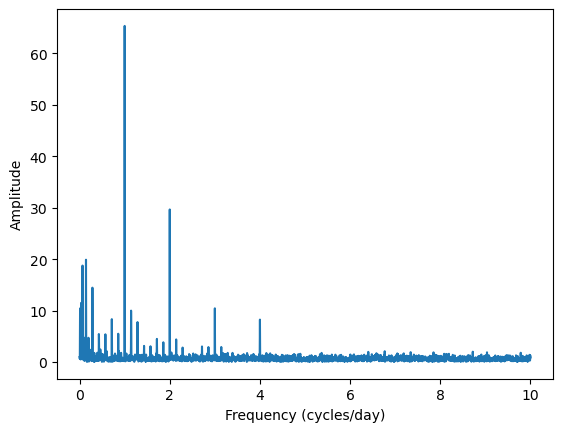

In [6]:
plt.plot(freq_grid.flatten(), periodogram_window.flatten())

plt.xlabel("Frequency (cycles/day)")
plt.ylabel("Amplitude")

For this example, we proceed with $\tau = 6$.

Now we can estimate the frequencies and fit the related parameters with the `lse_time_cont` function.

In [7]:
tau_constant = 6

constant, fitted_params = help_funcs.lse_time_cont(
    obs, periodogram_window, freq_grid, tau_constant, T
)

The estimated constant is:

In [8]:
print(constant)

[117.30993055]


The remainder of the estimated parameters are:

In [9]:
fitted_params

,freq,amplitude,phase
0,0.002107,744.916016,-0.763309
1,0.004215,694.190945,-1.535121
2,0.006322,632.547952,0.837166
3,0.008430,619.162474,0.054183
4,0.010537,1586.731493,-0.746831
5,0.010959,1345.705607,-0.306182
6,0.012645,109.431556,1.527806
7,0.032877,41.163725,0.528329
8,0.043836,23.035604,-0.966596
9,0.065753,74.311656,0.415566
